Customer churn refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer's last interaction with the site or service.

A Predictive Churn Model is a tool that defines the steps and stages of customer churn, or a customer leaving your service or product. ... But with an evolving churn model, you can fight for retention by acting on the metrics as they happen

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Churn_Modelling.csv")

dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
dataset.drop_duplicates(inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**dataset Analysis**

In [42]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

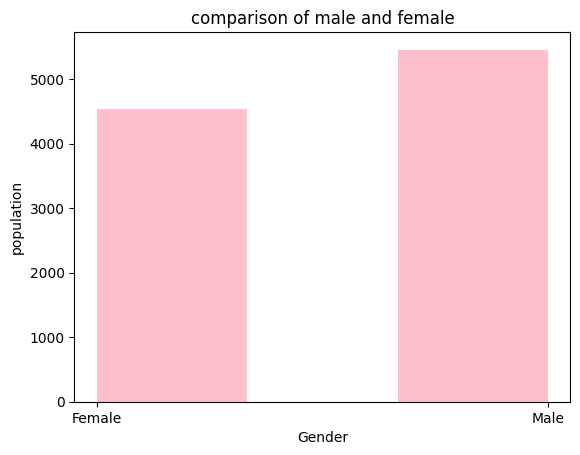

In [43]:
# Plotting the features of the datasetset to see the correlation between them

plt.hist(x = dataset.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [44]:
dataset['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

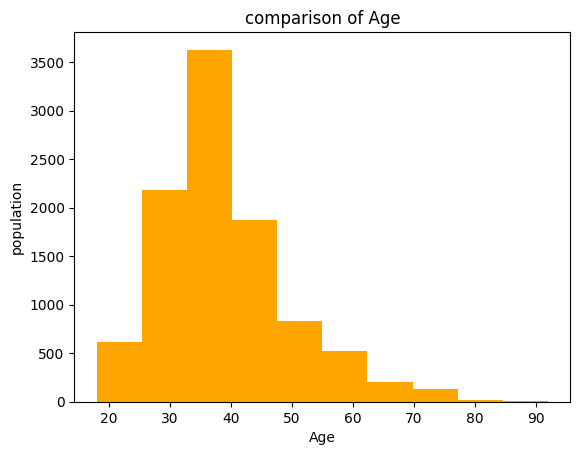

In [45]:
# comparison of age in the datasetset

plt.hist(x = dataset.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [46]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

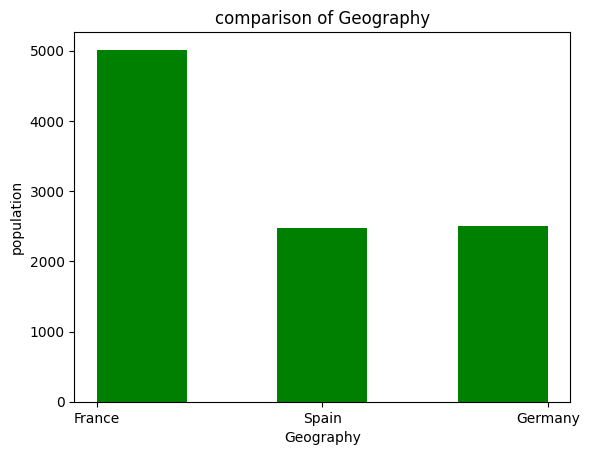

In [47]:
# comparison of geography

plt.hist(x = dataset.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [48]:
dataset['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

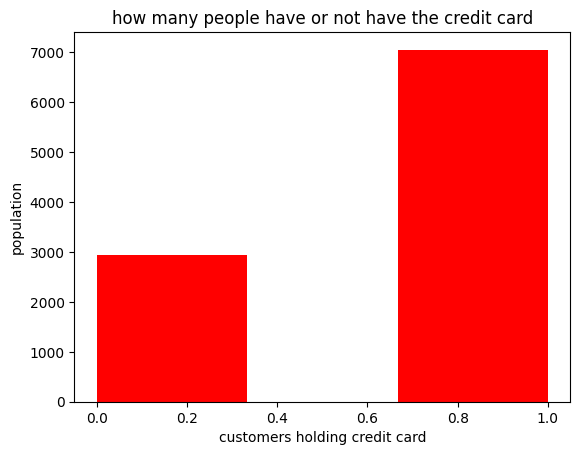

In [49]:
# comparision of how many customers hold the credit card

plt.hist(x = dataset.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [50]:
dataset['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

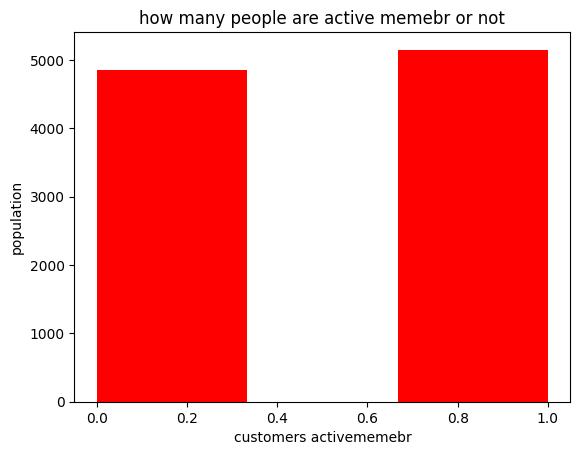

In [96]:
plt.hist(x = dataset.IsActiveMember, bins = 3, color = 'red')
plt.title('how many people are active memebr or not')
plt.xlabel('customers activememebr')
plt.ylabel('population')
plt.show()

<Axes: xlabel='Gender'>

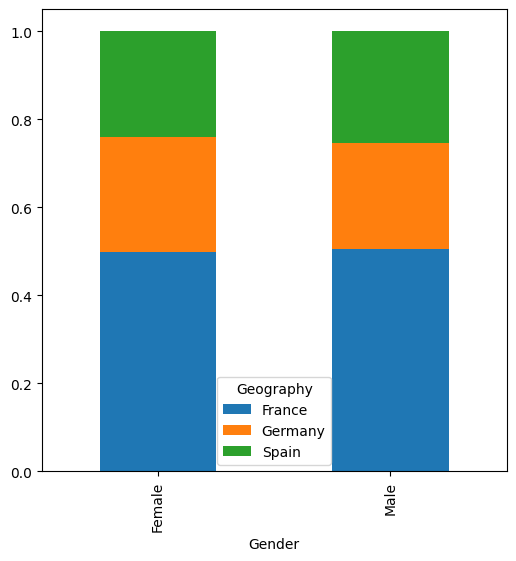

In [97]:
# comparison between Geography and Gender

Gender = pd.crosstab(dataset['Gender'],dataset['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

In [98]:
Gender

Geography  France  Germany  Spain
Gender                           
Female       2261     1193   1089
Male         2753     1316   1388

<Axes: xlabel='HasCrCard'>

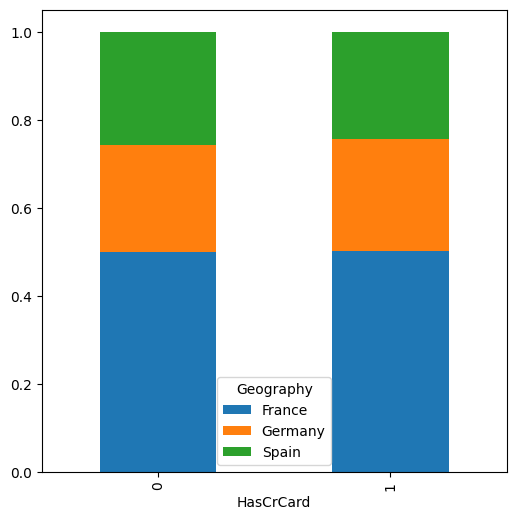

In [52]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(dataset['HasCrCard'], dataset['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

<Axes: xlabel='IsActiveMember'>

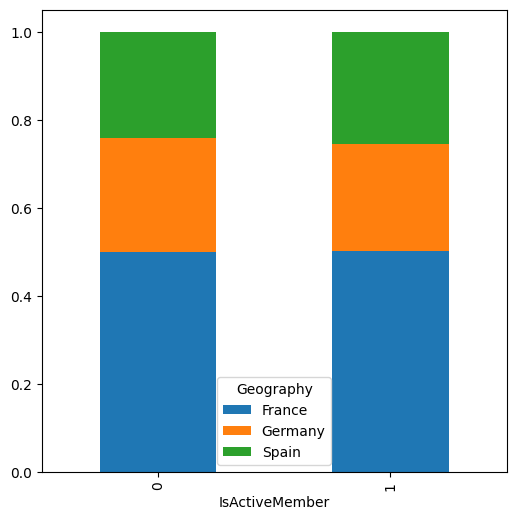

In [53]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(dataset['IsActiveMember'], dataset['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

In [54]:
# calculating total balance in france, germany and spain

total_france = dataset.Balance[dataset.Geography == 'France'].sum()
total_germany = dataset.Balance[dataset.Geography == 'Germany'].sum()
total_spain = dataset.Balance[dataset.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


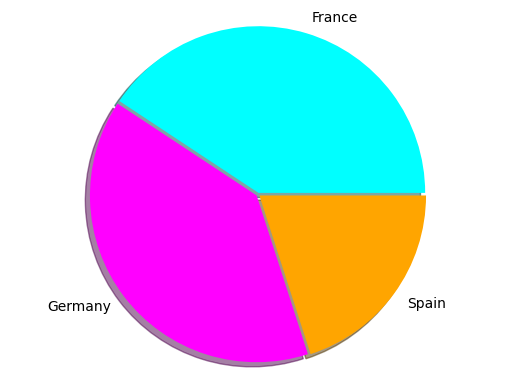

In [55]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

**dataset Preprocessing**

In [56]:
# Removing the unnecassary features from the datasetset

dataset = dataset.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(dataset.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [62]:
# splitting the datasetset into x(independent variables) and y(dependent variables)
X = dataset[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].to_numpy()
# labels (outputs / Y variable) for the model.
Y = dataset['Exited']
X
Y



0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [63]:
print(X)
print(Y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [64]:

#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [65]:
#Encoding Categorical Variable Geography
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,1] = np.array(LE1.fit_transform(X[:,1]))
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

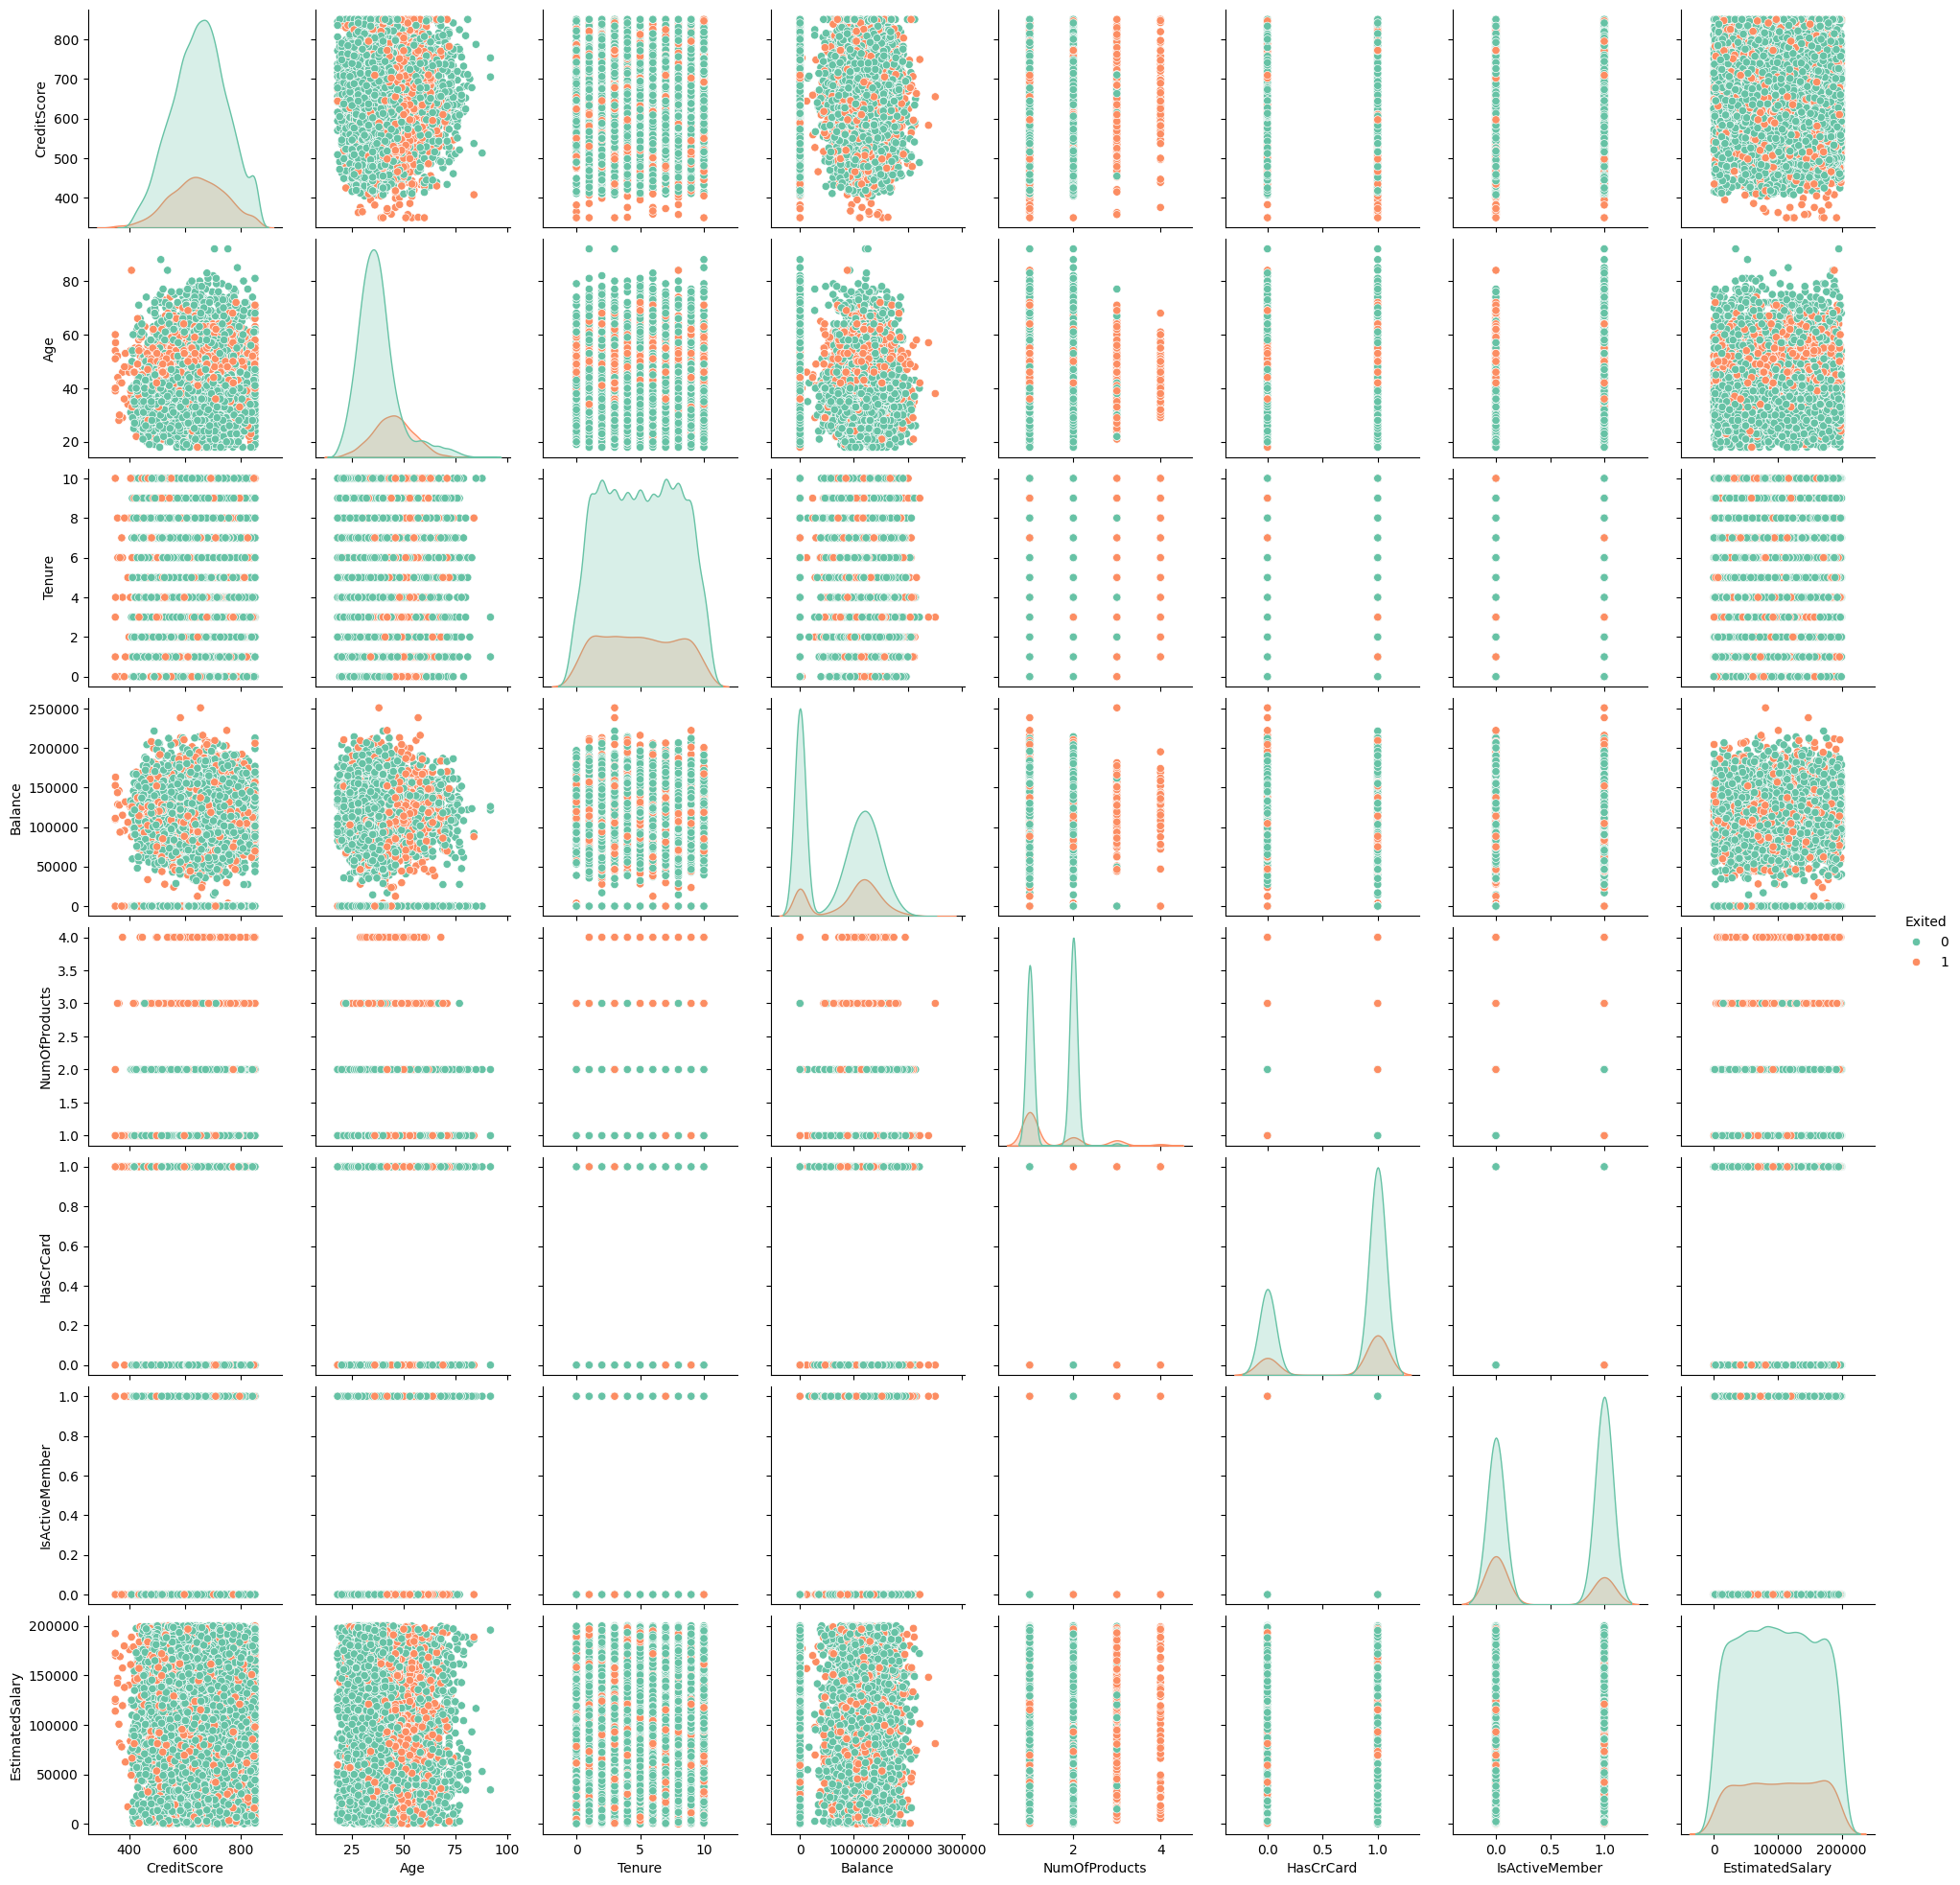

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=dataset,hue="Exited",palette="Set2")
plt.show()

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

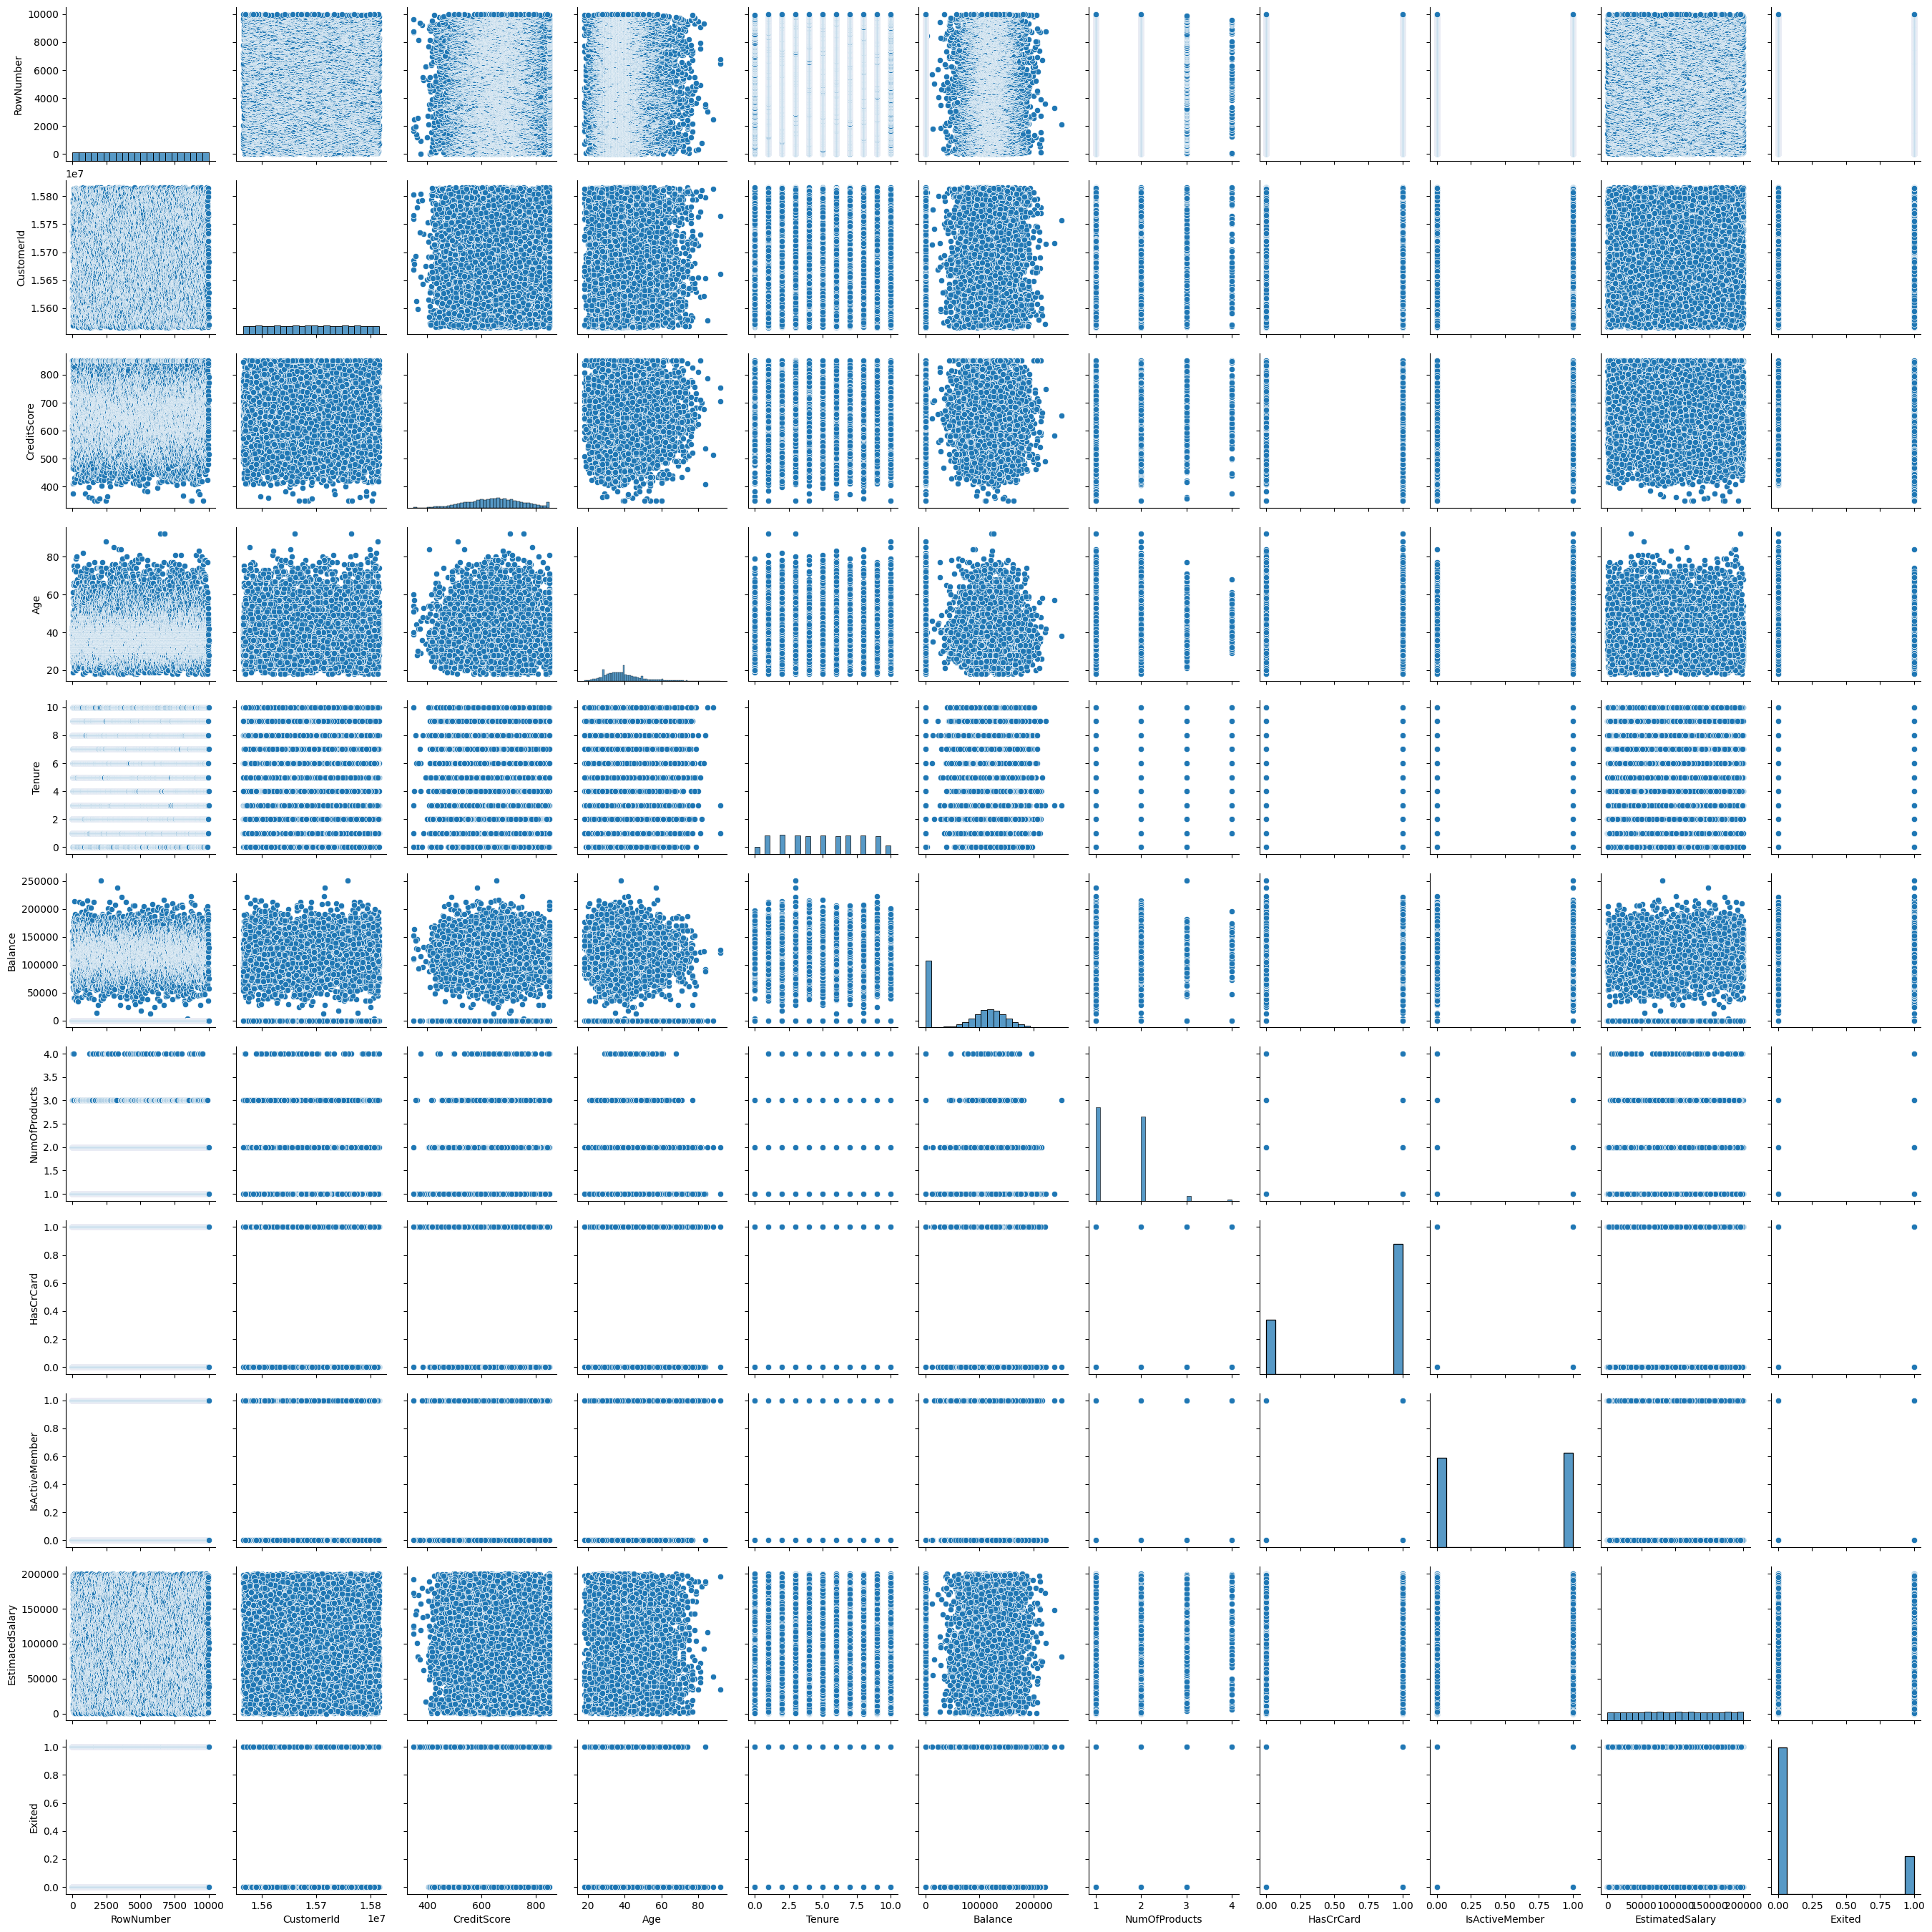

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=dataset,palette="Set2")
plt.show()

In [67]:
X_Df = pd.DataFrame(data = X, columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
X_Df[:5]

X_Df['Class'] = Y
X_Df

CreditScore Geography Gender Age Tenure    Balance NumOfProducts  \
0            619         0      0  42      2        0.0             1   
1            608         2      0  41      1   83807.86             1   
2            502         0      0  42      8   159660.8             3   
3            699         0      0  39      1        0.0             2   
4            850         2      0  43      2  125510.82             1   
...          ...       ...    ...  ..    ...        ...           ...   
9995         771         0      1  39      5        0.0             2   
9996         516         0      1  35     10   57369.61             1   
9997         709         0      0  36      7        0.0             1   
9998         772         1      1  42      3   75075.31             2   
9999         792         0      0  28      4  130142.79             1   

     HasCrCard IsActiveMember EstimatedSalary  Class  
0            1              1       101348.88      1  
1            0              1       112542.58      0  
2            1              0       113931.57      1  
3            0              0        93826.63      0  
4            1              1         79084.1      0  
...        ...            ...             ...    ...  
9995         1              0        96270.64      0  
9996         1              1       101699.77      0  
9997         0              1        42085.58      1  
9998         1              0        92888.52      1  
9999         1              0        38190.78      0  

[10000 rows x 11 columns]

In [68]:
# Delete target variable from Dataframe
del X_Df['Class']
X_Df

CreditScore Geography Gender Age Tenure    Balance NumOfProducts  \
0            619         0      0  42      2        0.0             1   
1            608         2      0  41      1   83807.86             1   
2            502         0      0  42      8   159660.8             3   
3            699         0      0  39      1        0.0             2   
4            850         2      0  43      2  125510.82             1   
...          ...       ...    ...  ..    ...        ...           ...   
9995         771         0      1  39      5        0.0             2   
9996         516         0      1  35     10   57369.61             1   
9997         709         0      0  36      7        0.0             1   
9998         772         1      1  42      3   75075.31             2   
9999         792         0      0  28      4  130142.79             1   

     HasCrCard IsActiveMember EstimatedSalary  
0            1              1       101348.88  
1            0              1       112542.58  
2            1              0       113931.57  
3            0              0        93826.63  
4            1              1         79084.1  
...        ...            ...             ...  
9995         1              0        96270.64  
9996         1              1       101699.77  
9997         0              1        42085.58  
9998         1              0        92888.52  
9999         1              0        38190.78  

[10000 rows x 10 columns]

PCA is a dimensionality reduction technique that identifies the directions of maximum variance in the data.

The number of principal components (n_components) determines the desired dimensionality of the transformed data.

The resulting principal components can be used for various purposes, such as visualization, feature extraction, and noise reduction.

In [69]:
# This creates an instance of the PCA class with n_components set to 2. 
# This means the PCA will reduce the dimensionality of the data to 2 principal components.

# We create 2 Principal Components out of the 8 Dimensional dataset and we save as a Dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_Df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf[:5]

principal component 1  principal component 2
0          -76157.145980           -7194.761639
1            8266.910414          -11846.105621
2           83998.633337           -7340.133436
3          -76741.325975             304.770459
4           47245.526441           24749.993710

In [14]:
# Information or variance that it is explained by the 2 PC/
# Proportion of Variance Explained: For each principal component, it indicates the percentage 
# of the total variance in the original dataset that is captured by that specific component.
pca.explained_variance_ratio_

array([0.54118404, 0.45881465])

Together, the first two principal components explain 100% (54.12% + 45.88%) of the variance in the data. 

This is expected since you've specified n_components=2 when creating the PCA object.

Relative Importance: Principal Component 1 captures slightly more variance than Principal Component 2.


Dimensionality Reduction: You've effectively reduced the dimensionality of your data from 

its original number of features to just two principal components.

Information Preservation: A significant portion of the original data's variance is preserved in these two components.

In [70]:
# We adding an additional column (the target variable = Y) to the Dataframe that we created previously
principalDf['Class'] = Y
principalDf

principal component 1  principal component 2  Class
0             -76157.145980           -7194.761639      1
1               8266.910414          -11846.105621      0
2              83998.633337           -7340.133436      1
3             -76741.325975             304.770459      0
4              47245.526441           24749.993710      0
...                     ...                    ...    ...
9995          -76551.522564           -2131.858090      0
9996          -18933.550281           -3089.246951      0
9997          -80759.555130           51889.555924      1
9998           -1965.606240            7070.424053      1
9999           48687.716198           65879.530980      0

[10000 rows x 3 columns]

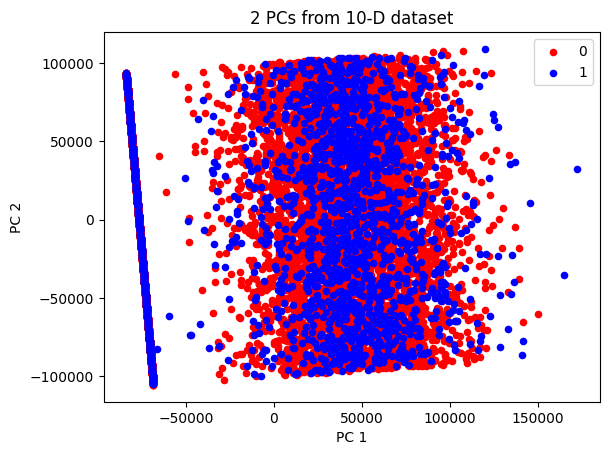

In [71]:
# This is a 2D visualization of the 2 PCs which contain 89% of the original information of the 8D dataset 
x1 = principalDf['principal component 1']
x2 = principalDf['principal component 2']
y = principalDf['Class'].astype(int)

plt.scatter(x1[y==0], x2[y==0], s=20, c='r')
plt.scatter(x1[y==1], x2[y==1], s=20, c='b')
# displaying the title
plt.title("2 PCs from 10-D dataset")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# Function add a legend  
plt.legend(["0", "1"], loc ="upper right")
plt.show()

In [17]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [72]:
# data scaling
# StandardScaler will standardize the features by removing the mean and scaling to unit variance
# so that each feature has μ = 0 and σ = 1

from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [142]:
X_scaled_Df = pd.DataFrame(data = x_scaled, columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
X_scaled_Df[:5]

CreditScore  Geography    Gender       Age    Tenure   Balance  \
0    -0.326221  -0.901886 -1.095988  0.293517 -1.041760 -1.225848   
1    -0.440036   1.515067 -1.095988  0.198164 -1.387538  0.117350   
2    -1.536794  -0.901886 -1.095988  0.293517  1.032908  1.333053   
3     0.501521  -0.901886 -1.095988  0.007457 -1.387538 -1.225848   
4     2.063884   1.515067 -1.095988  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0      -0.911583   0.646092        0.970243         0.021886  
1      -0.911583  -1.547768        0.970243         0.216534  
2       2.527057   0.646092       -1.030670         0.240687  
3       0.807737  -1.547768       -1.030670        -0.108918  
4      -0.911583   0.646092        0.970243        -0.365276

In [143]:
X_scaled_Df['Class'] = Y
X_scaled_Df

CreditScore  Geography    Gender       Age    Tenure   Balance  \
0       -0.326221  -0.901886 -1.095988  0.293517 -1.041760 -1.225848   
1       -0.440036   1.515067 -1.095988  0.198164 -1.387538  0.117350   
2       -1.536794  -0.901886 -1.095988  0.293517  1.032908  1.333053   
3        0.501521  -0.901886 -1.095988  0.007457 -1.387538 -1.225848   
4        2.063884   1.515067 -1.095988  0.388871 -1.041760  0.785728   
...           ...        ...       ...       ...       ...       ...   
9995     1.246488  -0.901886  0.912419  0.007457 -0.004426 -1.225848   
9996    -1.391939  -0.901886  0.912419 -0.373958  1.724464 -0.306379   
9997     0.604988  -0.901886 -1.095988 -0.278604  0.687130 -1.225848   
9998     1.256835   0.306591  0.912419  0.293517 -0.695982 -0.022608   
9999     1.463771  -0.901886 -1.095988 -1.041433 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Class  
0         -0.911583   0.646092        0.970243         0.021886      1  
1         -0.911583  -1.547768        0.970243         0.216534      0  
2          2.527057   0.646092       -1.030670         0.240687      1  
3          0.807737  -1.547768       -1.030670        -0.108918      0  
4         -0.911583   0.646092        0.970243        -0.365276      0  
...             ...        ...             ...              ...    ...  
9995       0.807737   0.646092       -1.030670        -0.066419      0  
9996      -0.911583   0.646092        0.970243         0.027988      0  
9997      -0.911583  -1.547768        0.970243        -1.008643      1  
9998       0.807737   0.646092       -1.030670        -0.125231      1  
9999      -0.911583   0.646092       -1.030670        -1.076370      0  

[10000 rows x 11 columns]

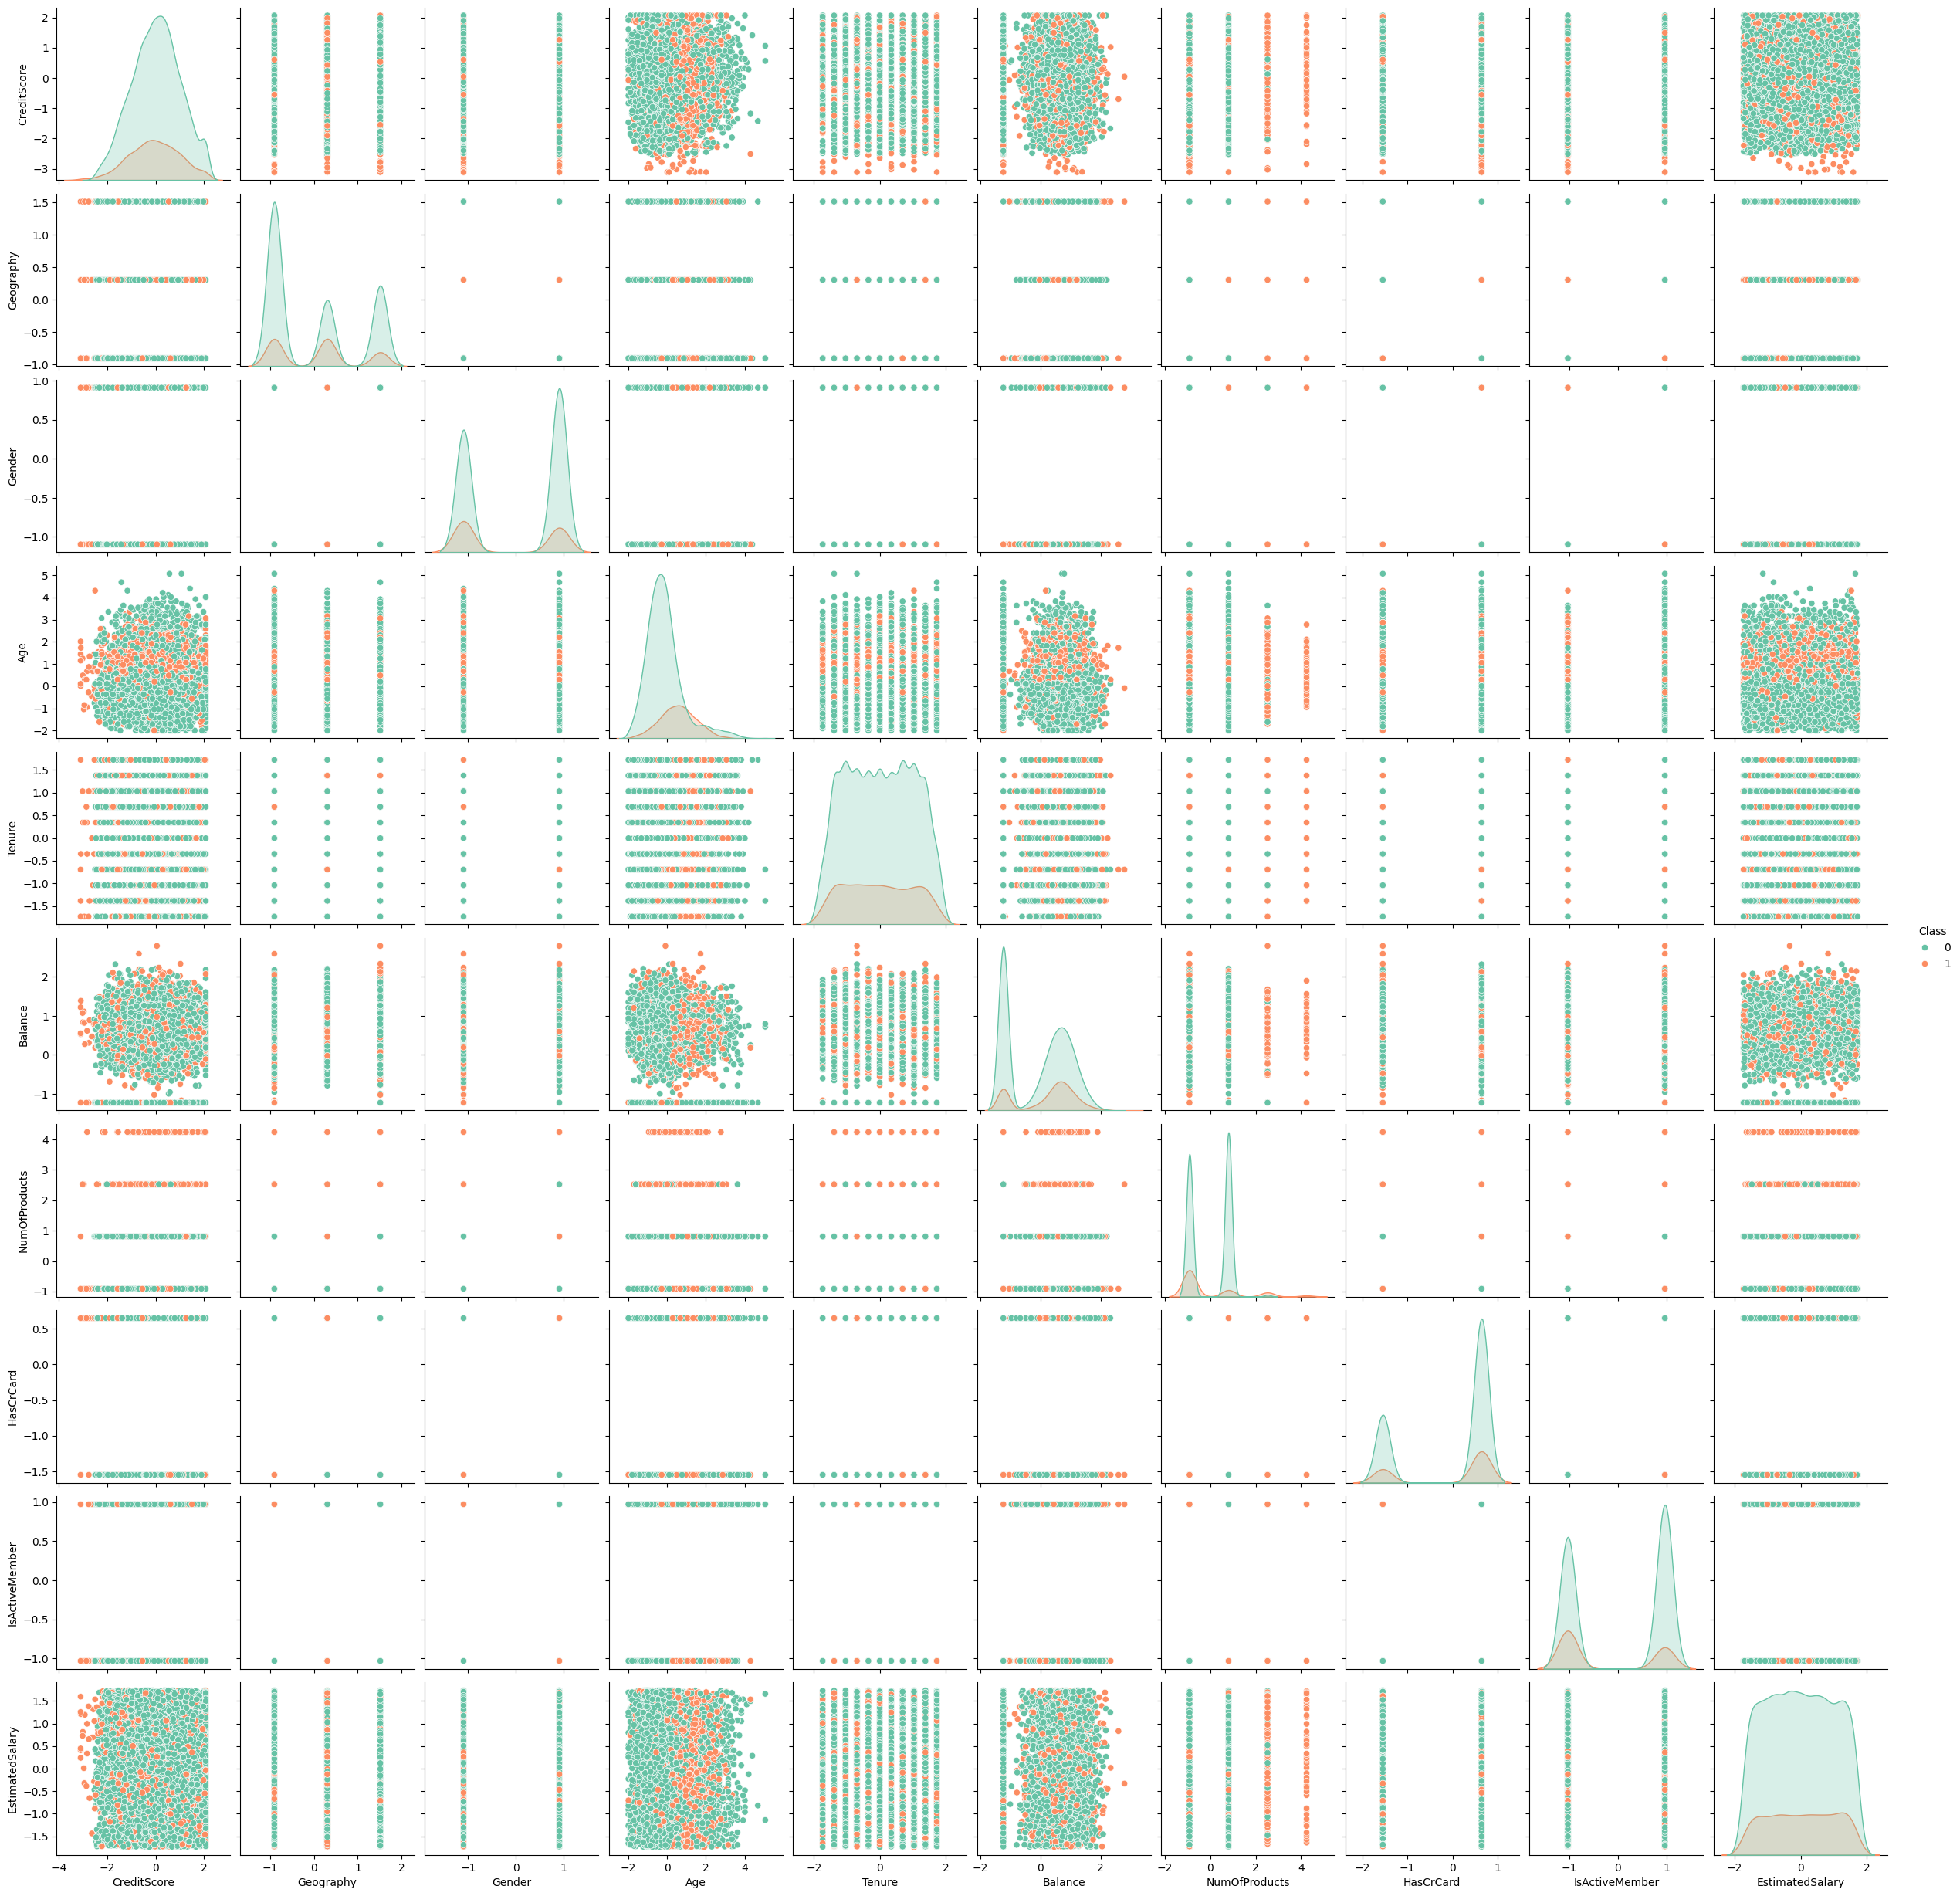

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=X_scaled_Df,hue="Class",palette="Set2")
plt.show()

In [76]:

# Delete target variable from Dataframe
del X_scaled_Df['Class']
X_scaled_Df

CreditScore  Geography    Gender       Age    Tenure   Balance  \
0       -0.326221  -0.901886 -1.095988  0.293517 -1.041760 -1.225848   
1       -0.440036   1.515067 -1.095988  0.198164 -1.387538  0.117350   
2       -1.536794  -0.901886 -1.095988  0.293517  1.032908  1.333053   
3        0.501521  -0.901886 -1.095988  0.007457 -1.387538 -1.225848   
4        2.063884   1.515067 -1.095988  0.388871 -1.041760  0.785728   
...           ...        ...       ...       ...       ...       ...   
9995     1.246488  -0.901886  0.912419  0.007457 -0.004426 -1.225848   
9996    -1.391939  -0.901886  0.912419 -0.373958  1.724464 -0.306379   
9997     0.604988  -0.901886 -1.095988 -0.278604  0.687130 -1.225848   
9998     1.256835   0.306591  0.912419  0.293517 -0.695982 -0.022608   
9999     1.463771  -0.901886 -1.095988 -1.041433 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0         -0.911583   0.646092        0.970243         0.021886  
1         -0.911583  -1.547768        0.970243         0.216534  
2          2.527057   0.646092       -1.030670         0.240687  
3          0.807737  -1.547768       -1.030670        -0.108918  
4         -0.911583   0.646092        0.970243        -0.365276  
...             ...        ...             ...              ...  
9995       0.807737   0.646092       -1.030670        -0.066419  
9996      -0.911583   0.646092        0.970243         0.027988  
9997      -0.911583  -1.547768        0.970243        -1.008643  
9998       0.807737   0.646092       -1.030670        -0.125231  
9999      -0.911583   0.646092       -1.030670        -1.076370  

[10000 rows x 10 columns]

In [77]:
# We create 2 Principal Components out of the 8 Dimensional dataset and we save as a Dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled_Df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf[:5]

principal component 1  principal component 2
0               0.357844               0.878636
1              -1.068628               1.562152
2               1.044228              -1.072255
3               1.457575               0.279611
4              -1.408791               1.573353

In [78]:
# Information or variance that it is explained by the 2 PC
pca.explained_variance_ratio_

array([0.1320624 , 0.11029644])

In [79]:
# We adding an additional column (the target variable = Y) to the Dataframe that we created previously
principalDf['Class'] = Y
principalDf

principal component 1  principal component 2  Class
0                  0.357844               0.878636      1
1                 -1.068628               1.562152      0
2                  1.044228              -1.072255      1
3                  1.457575               0.279611      0
4                 -1.408791               1.573353      0
...                     ...                    ...    ...
9995               1.538616              -0.605565      0
9996              -0.156257              -0.720738      0
9997               0.428385               0.782615      1
9998               0.433554              -0.160720      1
9999              -0.842806              -1.171436      0

[10000 rows x 3 columns]

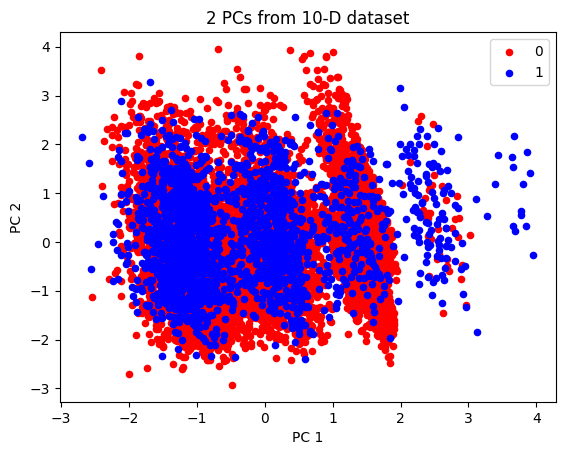

In [80]:
# This is a 2D visualization of the 2 PCs which contain 89% of the original information of the 8D dataset 
x1 = principalDf['principal component 1']
x2 = principalDf['principal component 2']
y = principalDf['Class'].astype(int)

plt.scatter(x1[y==0], x2[y==0], s=20, c='r')
plt.scatter(x1[y==1], x2[y==1], s=20, c='b')
# displaying the title
plt.title("2 PCs from 10-D dataset")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# Function add a legend  
plt.legend(["0", "1"], loc ="upper right")
plt.show()

In [144]:
# We apply K-Mean Clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)



from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled_Df)
    wcss.append(kmeans.inertia_)

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

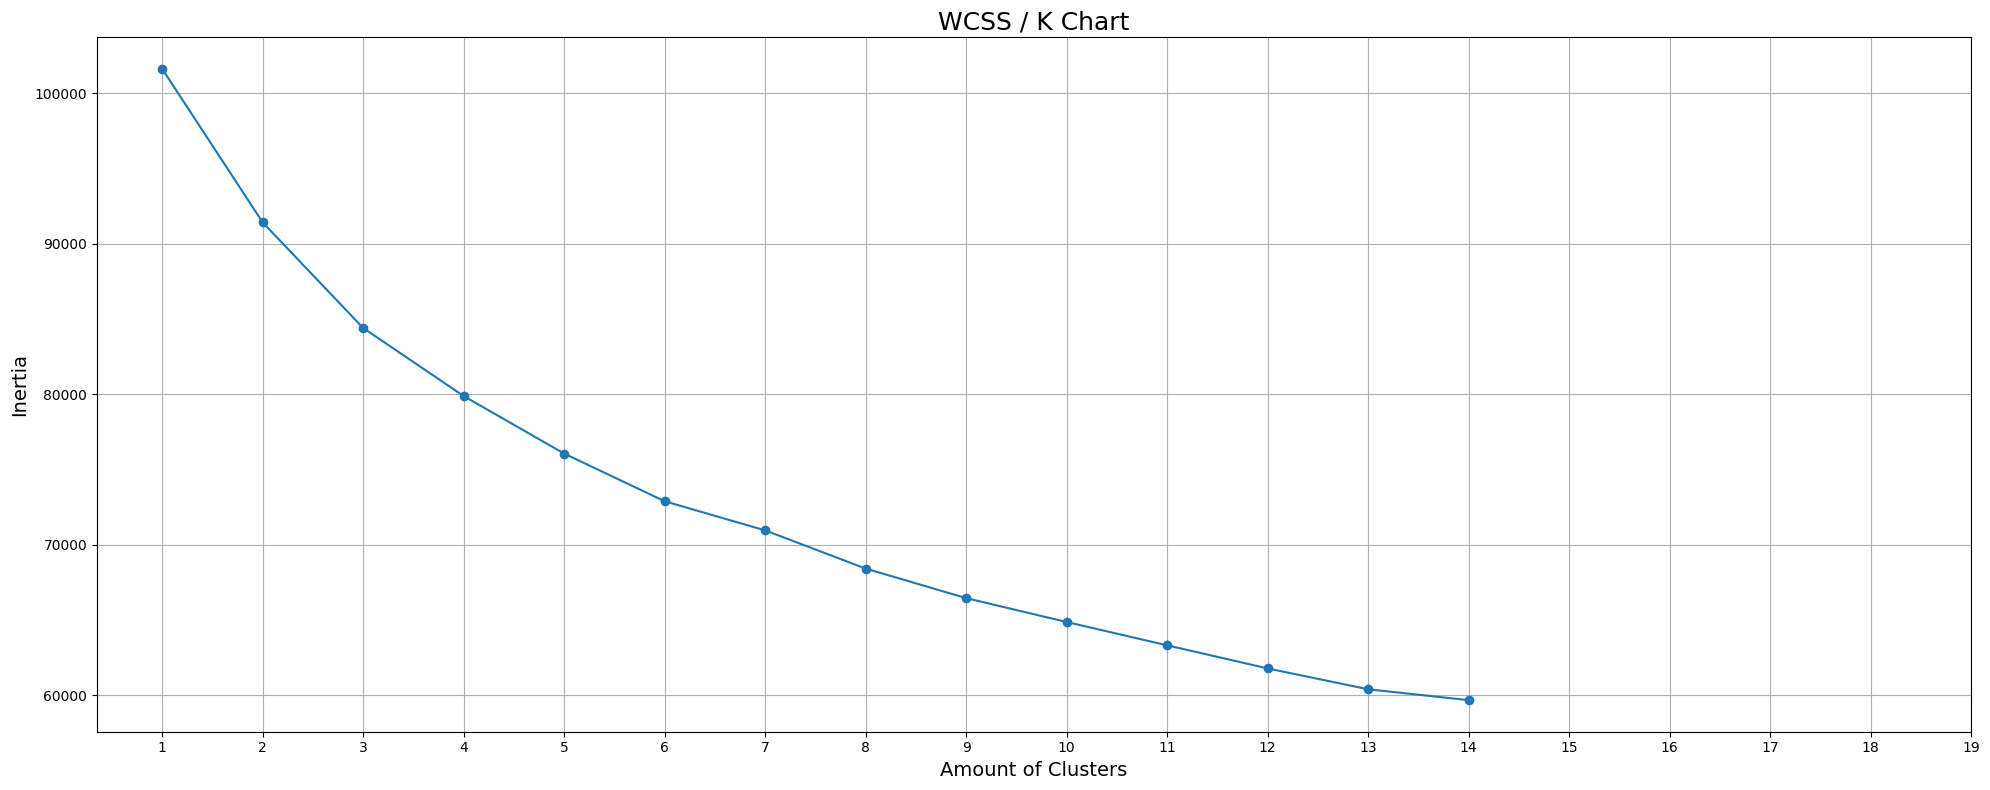

In [145]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [146]:
from kneed import KneeLocator

# Determining the elbow point in the wcss curve isn’t always straightforward. 
# kneed identifies the elbow point by using a solver
kl = KneeLocator(
        range(1, 15), wcss, curve="convex", direction="decreasing"
    )
kl.elbow

5

In [155]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X_Df)  

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
y_predict

array([0, 1, 1, ..., 0, 1, 1])

In [157]:
from sklearn.metrics import silhouette_score

silhouette_score(X_Df, kmeans.labels_, metric='euclidean')

0.4673990861935667

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

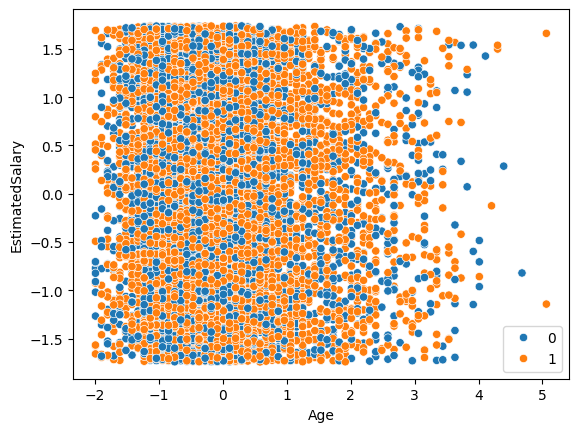

In [158]:
sns.scatterplot(data=X_scaled_Df, x = 'Age', y = 'EstimatedSalary', hue=kmeans.labels_)

In [2]:
# Hierarchical clustering


# Hierarchical clustering
# In K-Means, the number of optimal clusters was found using the elbow method. 
# In hierarchical clustering, the dendrograms are used for this purpose. 

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_Df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('If customer stays with the bank or not')
plt.ylabel('Euclidean distances')
plt.show()

NameError: name 'plt' is not defined

In [128]:
# We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters
# Im Agglomerative Hierarchical Clustering we assign each point to an individual cluster in this technique

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
Y_pred = cluster.fit_predict(X_Df)
Y_pred

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [129]:
df = pd.DataFrame({'Real Values':Y, 'Predicted Values':Y_pred})
df.to_csv("Output.csv", encoding='utf-8', index=False)
df

Real Values  Predicted Values
0               1                 1
1               0                 0
2               1                 0
3               0                 1
4               0                 0
...           ...               ...
9995            0                 1
9996            0                 0
9997            1                 1
9998            1                 0
9999            0                 0

[10000 rows x 2 columns]

In [130]:
from sklearn.metrics import accuracy_score
coef_acc = accuracy_score(df['Real Values'], df['Predicted Values'])
coef_acc

0.5347

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
Y_pred = cluster.fit_predict(X_Df)
Y_pred

NameError: name 'X_Df' is not defined

In [132]:
df = pd.DataFrame({'Real Values':Y, 'Predicted Values':Y_pred})
df.to_csv("Output.csv", encoding='utf-8', index=False)
df

Real Values  Predicted Values
0               1                 1
1               0                 0
2               1                 0
3               0                 1
4               0                 0
...           ...               ...
9995            0                 1
9996            0                 0
9997            1                 3
9998            1                 0
9999            0                 0

[10000 rows x 2 columns]

In [133]:
from sklearn.metrics import accuracy_score
coef_acc = accuracy_score(df['Real Values'], df['Predicted Values'])
coef_acc

0.3156

<Axes: xlabel='Age', ylabel='Balance'>

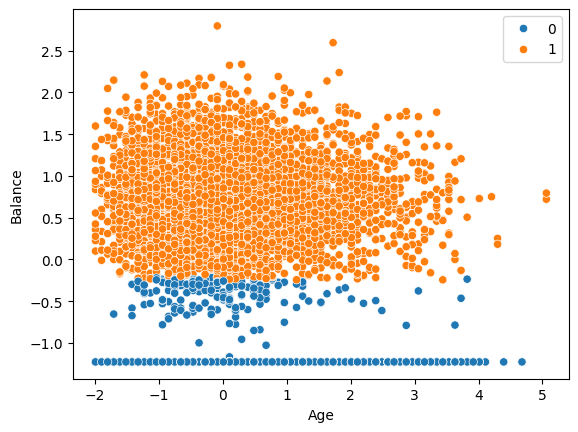

In [140]:
sns.scatterplot(data=X_scaled_Df, x = 'Age', y = 'Balance', hue=y_predict)